# Project: Investigate a No-Show Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Asking Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#communication">Communication</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This project goes through the entire process of data analysis on a real dataset named: No-Show dataset 

> The data analysis process pass through 5 main steps:
1. Asking Questions
2. Data Wrangling (Gathering, assessing and investigation, and cleaning data)
3. Exploratory Data Analysis
4. Draw conclusions (Using visualizing in this project)
5. Communication 

> The No-Show dataset collects information from 100k medical appointments in Brazil and is focused 
on the question of whether or not patients show up for their appointment.

<a id='question'></a>
## Asking Questions

> This section demonstrate what are the questions to be answered through this analysis.
> Deciding the questions help on choosing the right tools to analyse data to achieve the result
> These are the list of questions to be answered
* Is the duration between the schedule day and appointment day affects the patient show up for the appointment?
* Do patients with more chronic disease (Hipertension, Diabetes, Alcoholism, or Handcap) show up more than those who don't suffer from that? 
* Are some hospitals on a specific neighborhood have more ratio of no show appointments than others? In other word, does the location of the hospital affect its patients show up?

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section, The data will be loaded, assessed, and cleaned (to avoid duplicates, null values, and incorrect data types


### upload data file

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplt

#include the magic line to make visualizations appear on the notebook
%matplotlib inline

In [2]:
#read data file
df = pd.read_csv('noshow.csv')

#check thatdata is uploaded by showing the first 5 rows of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assessing and investigation of the data

In [3]:
#Dimensions of the dataset
df.shape

(110527, 14)

In [4]:
#Datatype of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Further investigate on the data types of ScheduledDay, AppointmentDay, Neighbourhood, and No-show columns. 
As it'll be used to answer the questions and its type isn't clear from "dtypes" command


In [5]:
type(df['ScheduledDay'][0])

str

In [6]:
type(df['AppointmentDay'][0])

str

In [7]:
type(df['Neighbourhood'][0])

str

In [8]:
type(df['No-show'][0])

str

ScheduledDay and AppointmentDay are better to be a date datatype. The gender and No-show will be easier to use in analysis if it's boolean

In [9]:
# Some useful statistics of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* The ststistics show that the data is cleaned from null values.
* There're some problems with the age columns. It has a minimum of -1 which is impossible, and a maximum of 115 which might be an outlier. see the box plot for the age to know about the outlier
* The handcap column contains values greater than 1. That's because each number corresponds to one type and the number is the sum of all conditions. 4 means a person with physical, visual, and other handicap conditions. 
<a href="#ref">see refrence 1</a>.
* more than 75% of the patients have no Hipertension, Diabetes, Alcoholism, or Handcap

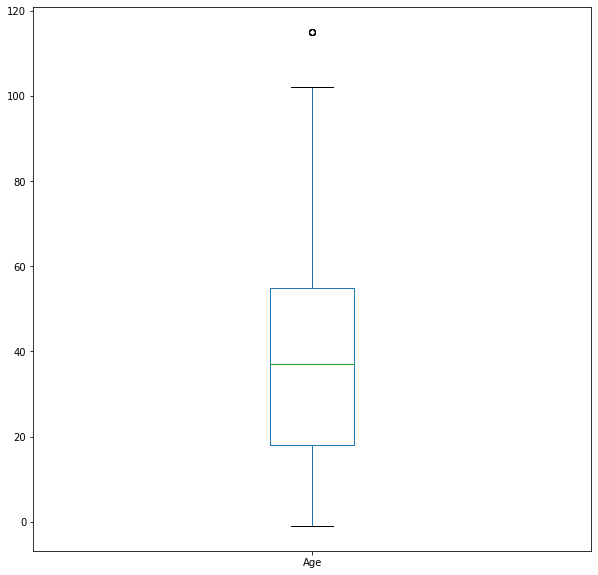

In [10]:
df.Age.plot(kind='box',figsize = (10,10),label="Age");

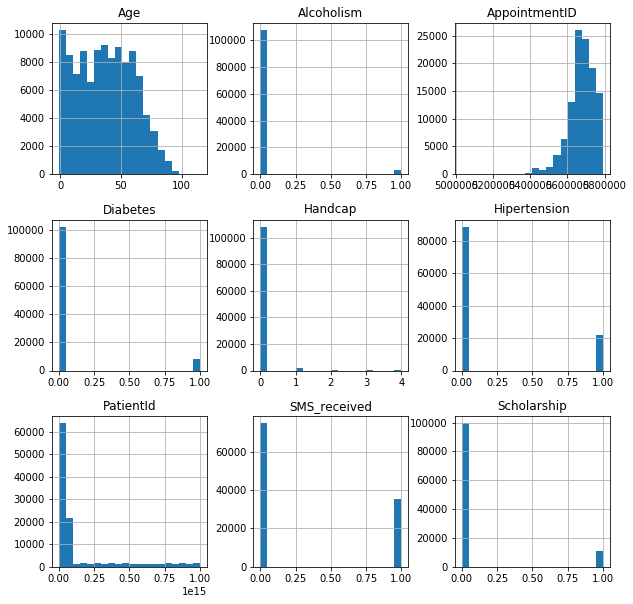

In [11]:
df.hist(figsize = (10,10),bins=20);

The boxplot and histogram of the age shows that values above almost 100 are an outliers.

### Data Cleaning (Remove unused columns, duplicates, and nulls. Convert to convenient datatypes)

#### First: remove columns that'll not be used in our analysis

In [12]:
# Depending on the questions on 1st section, unused columns are PatientId, AppointmentID, Scholarship, and SMS_received
df.drop(['Gender','PatientId','AppointmentID','Scholarship','SMS_received'],axis=1,inplace=True)

# Confirm that columns are dropped successfully
df.head()

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,No
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,No
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,No
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,No


In [13]:
# use naming conventions on columns' names
df.rename(columns=lambda x:x.strip().lower().replace("-","_"), inplace=True)
df.rename(columns = {'scheduledday':'scheduled_day'}, inplace=True)
df.rename(columns = {'appointmentday':'appointment_day'}, inplace=True)

# Confirm that columns are renamed successfully
df.head()

,scheduled_day,appointment_day,age,neighbourhood,hipertension,diabetes,alcoholism,handcap,no_show
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,No
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,No
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,No
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,No


#### Second: Remove duplicates rows

In [14]:
# Check for duplicated rows
sum(df.duplicated())

1335

In [15]:
# Duplicates in this datasert is most probably a typo error. 
# The scheduled_day, appointment_day are very precise quantities and it's unusual to have it duplicated
# Drop duplicated values

df.drop_duplicates(inplace=True)

# Confirm changes by checking #rows
df.shape[0]

109192

#### Third: Remove null values

In [16]:
# Check the number or rows with null values
df.isnull().sum()

scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
hipertension       0
diabetes           0
alcoholism         0
handcap            0
no_show            0
dtype: int64

>perfect! no null values

#### Forth: remove outliers and typo errors 

In [17]:
# remove outliers and negative values from the age
# check the rows with age > 100
df.query('age>100')

,scheduled_day,appointment_day,age,neighbourhood,hipertension,diabetes,alcoholism,handcap,no_show
58014,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,No
63912,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,1,Yes
68127,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,1,Yes
76284,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,1,No
90372,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,No
97666,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,1,0,0,0,No


In [18]:
# The result above shows that 102 is the boundary of an outliers
df.drop(df.query('age<0 | age>102').index, inplace=True)

#confirm changes
df.query('age<0')

,scheduled_day,appointment_day,age,neighbourhood,hipertension,diabetes,alcoholism,handcap,no_show


In [19]:
df.query('age>102')

,scheduled_day,appointment_day,age,neighbourhood,hipertension,diabetes,alcoholism,handcap,no_show


#### Finally: Change some columns to convenient data types

In [20]:
# It's more convenient to have the scheduled_day appointment_day as a date object instead of string
# We'll use datetime64[D] because we want to focus on the day
df['scheduled_day'] = df['scheduled_day'].astype('datetime64[D]')
df['appointment_day'] = df['appointment_day'].astype('datetime64[D]')

# Confirm changes
type(df['scheduled_day'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
# See the unique values in the no_show column
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
# Using 0,1 instead of Yes,No in the no-show coloumn make analysis and drawing easier
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

#confirm changes, check the unique values
df['no_show'].unique()

array([0, 1], dtype=int64)

See the number or rows after cleaning

In [23]:
print(df.shape[0],"rows")

109187 rows


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  Is the duration between the schedule day and appointment day affects the patient show up for the appointment?

In [24]:
# To answer this question, we need to calculate the dureation (number of days) between appointment_day and scheduled_day
# Creata a new colomn 'schedule_appoint_duration' and add it to the dataframe
# Assume that if appointment_day < scheduled_day it's a typo and the fields are repaced.
# To handle this problem use the absolute value 
df['schedule_appoint_duration'] = df.apply(lambda row: abs((row["appointment_day"] - row["scheduled_day"])).days, axis = 1)

# Confirm changes
df.head()

,scheduled_day,appointment_day,age,neighbourhood,hipertension,diabetes,alcoholism,handcap,no_show,schedule_appoint_duration
0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,1,0,0,0,0,0
1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0
2,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0
3,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,2016-04-29,2016-04-29,56,JARDIM DA PENHA,1,1,0,0,0,0


In [25]:
#Check that all numbers are non-negative
sum(df['schedule_appoint_duration']<0)

0

In [26]:
# Now, we can drop the scheduled_day and appointment_day column as we don't need any information regarding it
df.drop(['scheduled_day','appointment_day'], axis=1, inplace=True)

#Confirm changes
df.head(1)

,age,neighbourhood,hipertension,diabetes,alcoholism,handcap,no_show,schedule_appoint_duration
0,62,JARDIM DA PENHA,1,0,0,0,0,0


In [27]:
# Devide pateints into 2 dataframes, show and no-show
df_show = df.query('no_show == 0')
df_no_show = df.query('no_show == 1')

In [44]:
def plot_hist(column, title, xlabel, ylabel, bins_num1, bins_num2):

    fig, ax = pyplt.subplots(figsize = (8,6))

    ax.hist(df_show[column], bins=bins_num1, alpha=0.8,  label="show")
    ax.hist(df_no_show[column], bins=bins_num2, alpha=0.8,  label="no_show")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    pyplt.show;


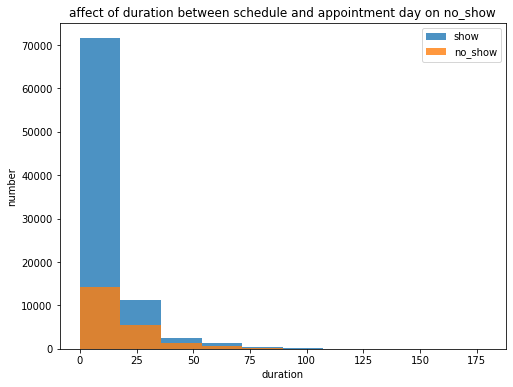

In [46]:
plot_hist('schedule_appoint_duration', 
          'affect of duration between schedule and appointment day on no_show',
          'duration', 
          'number',10,10)


We notice that the number of shows in the first interval exceed the number of no_show dramatically, while it's a double or less in next intervals. We can't conclude that as the duration increase the number of no_show will increase, because the number of patients isn't equal in all intervals, but the rate of no_show patients to the number of patients in a duration is increasing.   

### Research Question 2: Do patients with chronic disease (Hipertension, Diabetes, Alcoholism, or Handcap) show up more than those who don't suffer from that? 

In [33]:
# Create a colomn 'chronic_disease' which has the value of the sum of the patients chronic diseases 
# (Hipertension, Diabetes, Alcoholism, and Handcap)

df['chronic_disease'] = df.apply(lambda row: row['hipertension'] + row['diabetes'] + row['alcoholism'] + row['handcap'], axis = 1)

#Confirm changes
df.head()

,age,neighbourhood,hipertension,diabetes,alcoholism,handcap,no_show,schedule_appoint_duration,chronic_disease
0,62,JARDIM DA PENHA,1,0,0,0,0,0,1
1,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,56,JARDIM DA PENHA,1,1,0,0,0,0,2


In [34]:
# Now drop the hipertension, diabetes, alcoholism, and handcap columns as we only need to know how much the patient suffer from chronic diseases or not
df.drop(['hipertension','diabetes','alcoholism','handcap'], axis=1, inplace=True)

#Confirm changes
df.head()

,age,neighbourhood,no_show,schedule_appoint_duration,chronic_disease
0,62,JARDIM DA PENHA,0,0,1
1,56,JARDIM DA PENHA,0,0,0
2,62,MATA DA PRAIA,0,0,0
3,8,PONTAL DE CAMBURI,0,0,0
4,56,JARDIM DA PENHA,0,0,2


In [35]:
# See the values of the new column
df['chronic_disease'].unique()

array([1, 0, 2, 3, 4, 5], dtype=int64)

In [36]:
# Update the 2 dataframes, show and no-show, after adding and dropping columns
df_show = df.query('no_show == 0')
df_no_show = df.query('no_show == 1') 

In [37]:
df_show['chronic_disease'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [38]:
df_no_show['chronic_disease'].unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

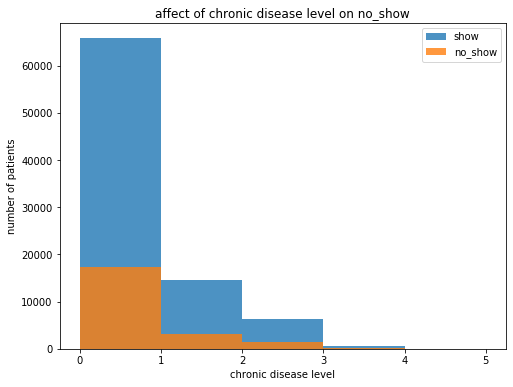

In [49]:
plot_hist('chronic_disease', 
          'affect of chronic disease level on no_show', 
          'chronic disease level', 
          'number of patients',4,5)


The result is opposite to expectations. The ratio of no_show patients to all patients is always very low if we devide it regarding the chronic disease level.   

### Research Question 3: Are some hospitals on a specific neighborhood have more ratio of no show appointments than others? In other word, does the location of the hospital affect its patients show up?

In [35]:
# create a dataframe that shows the number of no-show patients in each neighbourhood
df_neighbourhood = df.groupby('neighbourhood',as_index=False)['no_show'].sum()

# Confirm changes
df_neighbourhood.head()

,neighbourhood,no_show
0,AEROPORTO,1
1,ANDORINHAS,474
2,ANTÔNIO HONÓRIO,50
3,ARIOVALDO FAVALESSA,62
4,BARRO VERMELHO,91


In [36]:
# create a dataframe that shows the number of patients in each neighbourhood
df_neighbourhood_count = df.groupby('neighbourhood',as_index=False)['no_show'].count()

# Confirm changes
df_neighbourhood_count.head()

,neighbourhood,no_show
0,AEROPORTO,8
1,ANDORINHAS,2137
2,ANTÔNIO HONÓRIO,271
3,ARIOVALDO FAVALESSA,280
4,BARRO VERMELHO,422


In [37]:
# create an array that shows the ratio of no-show patients in a neighbourhood to the number of patients in the neighbourhood
df_neighbourhood_ratio = []
for i in range(len(df_neighbourhood)):
    df_neighbourhood_ratio.append(df_neighbourhood.no_show[i]/df_neighbourhood_count.no_show[i])

#confirm changes
df_neighbourhood_ratio[0]

0.125

In [38]:
df_neighbourhood_ratio[len(df_neighbourhood)-1]

0.16588235294117648

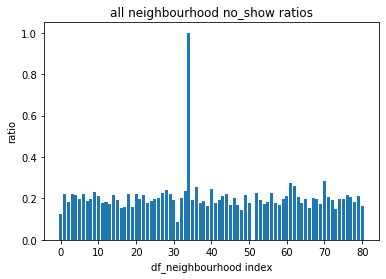

In [39]:
# plot the amount of all neighbourhood no_show ratios, Where the numbers on x-axis stands for the neighbourhood index 
pyplt.bar(np.arange(len(df_neighbourhood_ratio)),df_neighbourhood_ratio)
pyplt.title('all neighbourhood no_show ratios')
pyplt.xlabel('df_neighbourhood index')
pyplt.ylabel('ratio');


In [40]:
# See the neighborhood with high no_show ratio (index 34)
df_neighbourhood.neighbourhood[34]

'ILHAS OCEÂNICAS DE TRINDADE'

In [41]:
# See the rows with ILHAS OCEÂNICAS DE TRINDADE as a neighborhood
df.query('neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE"')

,age,neighbourhood,no_show,schedule_appoint_duration,chronic_disease
48754,51,ILHAS OCEÂNICAS DE TRINDADE,1,29,0
48765,58,ILHAS OCEÂNICAS DE TRINDADE,1,29,0


The ratio of no_show patients is close in all neighborhoods except ILHAS OCEÂNICAS DE TRINDADE, but we can't make a good estimation as there's only 2 records from that neighborhood.    

<a id='conclusions'></a>
## Conclusions

* The duration between the schedule and appointment time increase the percentage of no_show patients.

* The chronic disease level doesn't effect the no_show percentage.

* Most neighborhoods have similar ratios of no-show patients except one neighborhood, where the ration equal 1. This lead us to conclude that neighborhoods doesn't have strong relationship with no-show, the expected one result from a small number of records on that neighborhood (2 records).

> So duration is the most effective feature from the features we have analyse.

## Limitation

* All neighborhoods in the dataset are from the same city, the capital city [see refrence 2]. Recording captal city's neighborhoods without recording the patient's city or neighborhood doesn't provide a good estimation of no_show. Patients in small vellages or cities have a big probability to come to the capital city. Patients far from capital cities have more probabilities of no-show than those living there. Also, some neighborhoods has very few records so we can't make any predictions.

* No information about if the appointment is on formal holidays or in normal workdays, there's a probability that persons will show up on workdays more than holidays

* There is no information about the hospitals, is it public or private? How much patients will pay for a visit? Does the hospital apply a fee for those who take appointments and don't show up (There must be a huge decrease in no_show percentage if that applied)?  


## Communication

> The comminucation way used to share the conclusions of this study is this report.

<a id='ref'></a>
## Refrences

1. https://rstudio-pubs-static.s3.amazonaws.com/277583_44e900b120254f6895e1ee023d1789b9.html
2. https://www.kaggle.com/joniarroba/noshowappointments/discussion/40011
